In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv')
df[:10]

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


In [3]:
df.shape

(4269, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [5]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [6]:
df.describe(include='O')

,education,self_employed,loan_status
count,4269,4269,4269
unique,2,2,2
top,Graduate,Yes,Approved
freq,2144,2150,2656


In [7]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
## df['residential_assets_value'] = df['residential_assets_value'].abs()

In [10]:
df.columns = df.columns.str.strip()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [12]:
df['residential_assets_value'] = df['residential_assets_value'].abs()

In [13]:
df[:5]

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


## Addission new columns

In [14]:
#cibi_rating 
def cibil_rating(value):
    if 300 <=value <=549:
        return 'Poor'
    elif 550 <= value <= 649:
        return 'Averge'
    elif 650 <= value <= 749:
        return 'Good'
    else:
        return 'Excellent' 
   
    

In [15]:
df['cibil_rating'] = df['cibil_score'].apply(cibil_rating)

In [16]:
df[:5]

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil_rating
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor


In [17]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.473928e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.502129e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,0.000000e+00,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [18]:
df.cibil_rating.value_counts()

cibil_rating
Poor         1785
Excellent    1056
Good          745
Averge        683
Name: count, dtype: int64

In [19]:

df.income_annum.min()
df.income_annum.max()

9900000

In [20]:
## income column

def income_levels(value):
    if 200000<= value <= 1000000:
        return 'Low'
    elif 1000001 <= value <= 4000000:
        return 'Low Middle'
    elif 4000001 <= value <=  7500000:
        return 'Upper Middle'
    elif 7500001 <= value <= 10000000:
        return 'High'
    else:
        return 'Very high income'       

In [21]:
df['income_level'] = df['income_annum'].apply(income_levels)

In [22]:
df[:2]

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil_rating,income_level
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper Middle


In [23]:

df.loan_amount.max()
df.loan_amount.min()

300000

In [24]:
def loan_rating(value):
    if 300000 <= value <=1000000:
        return 'Bronze'
    elif 1000001 <=value <= 5000000:
        return 'Silver'
    elif  5000001 <= value <= 10000000:
        return 'Gold'
    elif 10000001<= value <=20000000:
        return 'Platinum'
    else:
        return 'diamond'        
    

In [25]:
df['loan_rating'] = df.loan_amount.apply(loan_rating)

In [26]:
df[:2]

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil_rating,income_level,loan_rating
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,diamond
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper Middle,Platinum


In [27]:
df.loan_term.value_counts()

loan_term
6     490
12    456
4     447
10    436
18    422
16    412
20    411
14    405
2     404
8     386
Name: count, dtype: int64

In [28]:
# loarn term range 

def loanterm_range(value):
    if 2 <=value <=7:
        return 'Short term'
    if 8<=value<=14:
        return 'intermediate'
    else:
        return 'long term'

In [29]:
df['loanterm_type'] =df.loan_term.apply(loanterm_range)

In [30]:
df[:2]

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil_rating,income_level,loan_rating,loanterm_type
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,diamond,intermediate
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper Middle,Platinum,intermediate


In [31]:
# number of dependents
def dependents(value):
    if 0<= value <=1:
        return 'low'
    if 2<= value <= 3:
        return 'Moderate'
    else:
        return 'high'
    

In [32]:
df['Dependents_level'] = df['no_of_dependents'].apply(dependents)

In [33]:
df[:2]

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil_rating,income_level,loan_rating,loanterm_type,Dependents_level
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,diamond,intermediate,Moderate
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper Middle,Platinum,intermediate,low


In [34]:
df.cibil_rating.value_counts()

cibil_rating
Poor         1785
Excellent    1056
Good          745
Averge        683
Name: count, dtype: int64

## Exploratory analysis

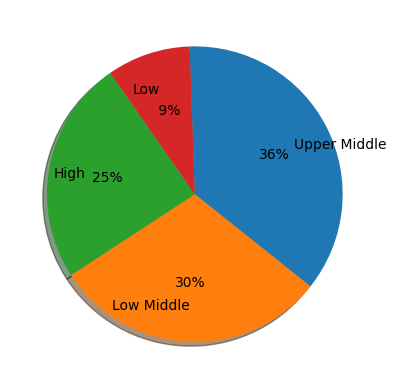

In [35]:
income = df['income_level'].value_counts().reset_index()#.plot(kind='bar',subplots=True)
income

# sns.countplot(data=income,x='count')
plt.pie(income['count'],labels=income['income_level'],autopct='%2.0f%%',shadow=True,counterclock=False,labeldistance=.75,startangle=92)
plt.show()

<Axes: ylabel='count'>

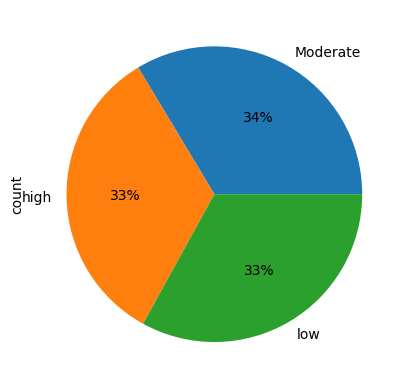

In [36]:
df.Dependents_level.value_counts().plot(kind='pie',autopct="%2.0f%%")


In [37]:
df[:2]

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil_rating,income_level,loan_rating,loanterm_type,Dependents_level
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,diamond,intermediate,Moderate
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper Middle,Platinum,intermediate,low


<Axes: xlabel='education', ylabel='0'>

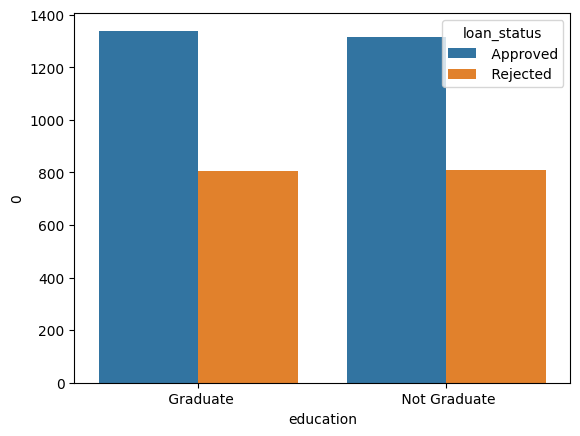

In [38]:
education = df.groupby(['education','loan_status']).size().reset_index()
education
sns.barplot(education,x='education',y=0,hue='loan_status')

In [39]:
pivot_table = education.pivot(index = 'education',columns='loan_status',values=0)
pivot_table

loan_status,Approved,Rejected
education,,
Graduate,1339,805
Not Graduate,1317,808


In [40]:
row_totals = pivot_table.sum(axis=1)
row_totals

education
 Graduate        2144
 Not Graduate    2125
dtype: int64

In [41]:
percentage = pivot_table.div(row_totals,axis=0)*100
percentage

loan_status,Approved,Rejected
education,,
Graduate,62.453358,37.546642
Not Graduate,61.976471,38.023529


<Axes: xlabel='loan_status', ylabel='education'>

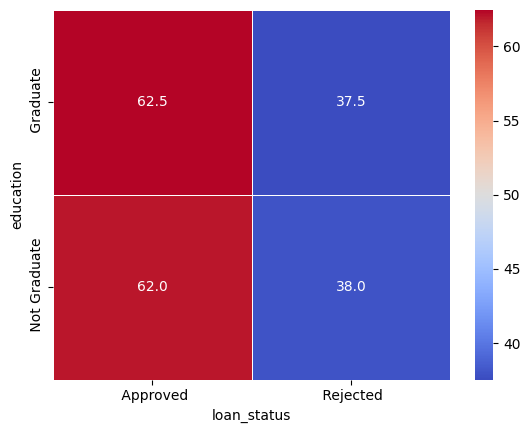

In [42]:
sns.heatmap(percentage,annot=True,cmap='coolwarm',linewidths=.5,fmt = '.1f')

In [43]:
df[:2]

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil_rating,income_level,loan_rating,loanterm_type,Dependents_level
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,diamond,intermediate,Moderate
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper Middle,Platinum,intermediate,low


In [44]:
employment_type = df.groupby(['self_employed','loan_status']).size().reset_index()
employment_type

,self_employed,loan_status,0
0,No,Approved,1318
1,No,Rejected,801
2,Yes,Approved,1338
3,Yes,Rejected,812


In [45]:
pivotavle_ = employment_type.pivot(index = 'self_employed',columns='loan_status',values=0)
pivotavle_

loan_status,Approved,Rejected
self_employed,,
No,1318,801
Yes,1338,812


In [46]:
rowtotal_ = pivot_table.sum()
rowtotal_

loan_status
 Approved    2656
 Rejected    1613
dtype: int64

In [47]:
percentage_ = pivot_table.div(rowtotal_)*100
percentage_

loan_status,Approved,Rejected
education,,
Graduate,50.414157,49.907006
Not Graduate,49.585843,50.092994


<Axes: xlabel='loan_status', ylabel='education'>

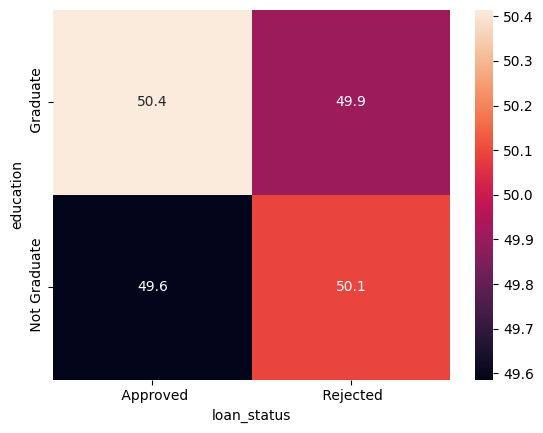

In [48]:
sns.heatmap(percentage_, annot=True , fmt = '.1f')

In [49]:
df[:5]

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil_rating,income_level,loan_rating,loanterm_type,Dependents_level
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,diamond,intermediate,Moderate
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper Middle,Platinum,intermediate,low
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,diamond,long term,Moderate
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,diamond,intermediate,Moderate
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,diamond,long term,high


In [50]:
#loan by civi score
cibil_rating = df.groupby(['cibil_rating','loan_status']).size().reset_index()
pivotable_cibil = cibil_rating.pivot(index='loan_status',columns='cibil_rating',values=0)
pivotable_cibil
rawtoatal_cibil =  pivotable_cibil.sum()
percentage_cibil = pivotable_cibil.div(rawtoatal_cibil)
percentage_cibil

cibil_rating,Averge,Excellent,Good,Poor
loan_status,,,,
Approved,0.997072,0.994318,0.993289,0.103641
Rejected,0.002928,0.005682,0.006711,0.896359


<Axes: xlabel='cibil_rating', ylabel='loan_status'>

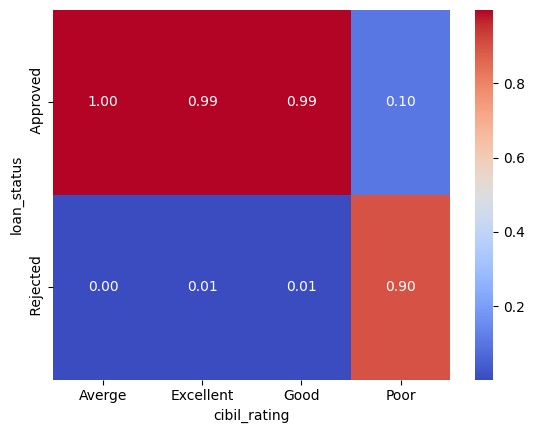

In [51]:
sns.heatmap(percentage_cibil,annot=True,cmap='coolwarm',fmt='.2f')

<Axes: >

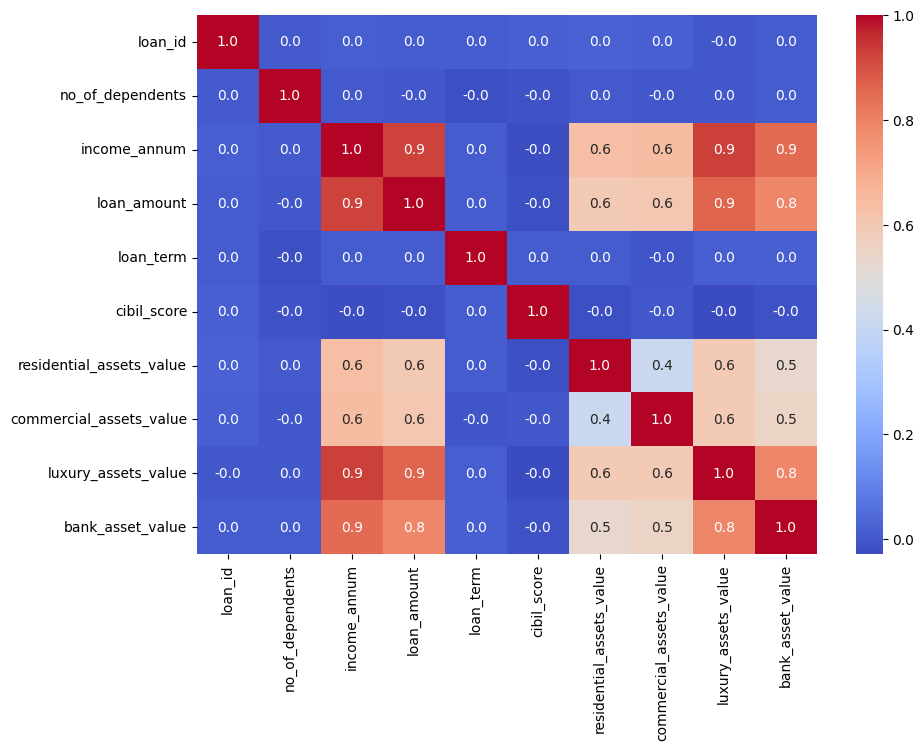

In [52]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(numeric_only=True),vmax=True,annot=True,cmap='coolwarm',fmt='.1f')

In [53]:
df.select_dtypes('int')

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000
...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1000000,2300000,12,317,2800000,500000,3300000,800000
4265,4266,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000
4266,4267,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000
4267,4268,1,4100000,12800000,8,780,8200000,700000,14100000,5800000


In [54]:
asset = ['residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value']
income= 'income_annum'

In [55]:
correlations = df[asset +[income]].corr()
correlations

,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,income_annum
residential_assets_value,1.000000,0.414799,0.590919,0.527401,0.636824
commercial_assets_value,0.414799,1.000000,0.591128,0.548576,0.640328
luxury_assets_value,0.590919,0.591128,1.000000,0.788517,0.929145
bank_asset_value,0.527401,0.548576,0.788517,1.000000,0.851093
income_annum,0.636824,0.640328,0.929145,0.851093,1.000000
